
## Q1.1
Given :

- The received value $  x $ follows a normal distribution: $  x \sim N(\theta, 4) $
- The prior distribution of $\theta$ is: $ \theta \sim N(5, 9) $
- We receive $ x = 6 $

We need to find the posterior distribution $ p(\theta \mid x) $.

The general formula for Bayesian updating with normal distributions is:


$\mu_{\text{post}} = \frac{\sigma_x^2 \mu_0 + \sigma_0^2 x}{\sigma_x^2 + \sigma_0^2}$

$\sigma_{\text{post}}^2 = \frac{\sigma_x^2 \sigma_0^2}{\sigma_x^2 + \sigma_0^2}$
Where:
 $ \mu_0 $ and $ \sigma_0^2 $ are the mean and variance of the prior distribution of $\theta$
 $ x $ and $ \sigma_x^2 $ are the observed value and the variance of the likelihood distribution

- Prior mean $ \mu_0 = 5 $
- Prior variance $ \sigma_0^2 = 9 $
- Likelihood variance $ \sigma_x^2 = 4 $
- Observed value $ x = 6 $

Posterior Variance

$$
\sigma_{\text{post}}^2 = \frac{\sigma_x^2 \sigma_0^2}{\sigma_x^2 + \sigma_0^2} = \frac{4 \cdot 9}{4 + 9} = \frac{36}{13}
$$

Posterior Mean

$$
\mu_{\text{post}} = \frac{\sigma_x^2 \mu_0 + \sigma_0^2 x}{\sigma_x^2 + \sigma_0^2} = \frac{4 \cdot 5 + 9 \cdot 6}{4 + 9} = \frac{20 + 54}{13} = \frac{74}{13}
$$

Result

The posterior distribution $ p(\theta \mid x) $ is:

$
\theta \mid x \sim N\left(\frac{74}{13}, \frac{36}{13}\right)
$



## Q 1.4

In [1]:
# Given values
mu_0 = 100      # prior mean
variance_0 = 152  # prior variance
variance_1 = 100  # variance of likelihood
observed_scores = {
    "Randall Vard": 80,
    "Mary1": 150
}

# Function to calculate the posterior mean
def calculate_posterior_mean(x, mu_0, variance_0, variance_1):
    return (variance_0 * x + variance_1 * mu_0) / (variance_0 + variance_1)

# Calculate posterior means
posterior_means = {name: calculate_posterior_mean(score, mu_0, variance_0, variance_1) for name, score in observed_scores.items()}

# Print results
for name, mean in posterior_means.items():
    print(f"Posterior Mean for {name}: {mean}")


Posterior Mean for Randall Vard: 87.93650793650794
Posterior Mean for Mary1: 130.15873015873015


## Q3



In logistic regression for binary classification, the likelihood function for the dataset \((X, y)\) given the parameters \(\beta\) is defined as:

$$
P(y | X, \beta) = \prod_{i=1}^n P(y_i | X_i, \beta)
$$

where $P(y_i | X_i, \beta)$ is given by the logistic function:

$$
P(y_i = 1 | X_i, \beta) = \sigma(X_i \beta) = \frac{1}{1 + \exp(-X_i \beta)}
$$

and

$$
P(y_i = 0 | X_i, \beta) = 1 - \sigma(X_i \beta) = \frac{\exp(-X_i \beta)}{1 + \exp(-X_i \beta)}
$$



Assume a Gaussian prior on the parameters $\beta$:

$$
P(\beta) = \mathcal{N}(\beta | 0, \sigma^2 I)
$$

where $0$ is the mean vector and $\sigma^2 I$ is the covariance matrix with $I$ being the identity matrix.


using Bayes’ theorem, the posterior distribution is proportional to the product of the likelihood and the prior:

$$
P(\beta | X, y) \propto P(y | X, \beta) P(\beta)
$$

Taking the logarithm to get the log-posterior (which simplifies the product to a sum), we have:

$$
\log P(\beta | X, y) = \log P(y | X, \beta) + \log P(\beta) + \text{constant}
$$

The log-likelihood $\log P(y | X, \beta)$ is:

$$
\log P(y | X, \beta) = \sum_{i=1}^n \left[ y_i \log \sigma(X_i \beta) + (1 - y_i) \log (1 - \sigma(X_i \beta)) \right]
$$

The log-prior $\log P(\beta)$ is:

$$
\log P(\beta) = -\frac{1}{2\sigma^2} \beta^T \beta + \text{constant}
$$



The MAP estimate maximizes the log-posterior:

$$
\hat{\beta}_{MAP} = \arg\max_{\beta} \left( \log P(y | X, \beta) + \log P(\beta) \right)
$$

This is equivalent to minimizing the negative log-posterior:

$$
\hat{\beta}_{MAP} = \arg\min_{\beta} \left( -\log P(y | X, \beta) - \log P(\beta) \right)
$$






VC Dimension for Axis-Aligned Rectangle in 2D:


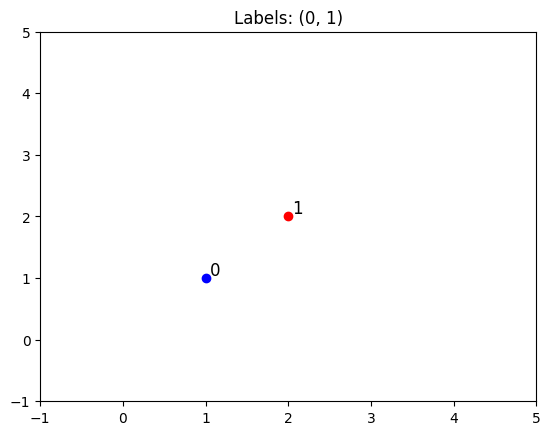


VC Dimension for Linear Function in d Dimensions:
Dimension 1: VC Dimension = 2
Dimension 2: VC Dimension = 3
Dimension 3: VC Dimension = 4
Dimension 4: VC Dimension = 5
Dimension 5: VC Dimension = 6

VC Dimension for Constant Function:
VC Dimension = 0


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


def plot_rectangle(points, labels, rect=None, title=""):
    fig, ax = plt.subplots()
    for i, (point, label) in enumerate(zip(points, labels)):
        ax.scatter(*point, color='red' if label else 'blue')
        ax.annotate(f'{i}', (point[0] + 0.05, point[1] + 0.05), fontsize=12)
    if rect:
        (xmin, xmax, ymin, ymax) = rect
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=None, edgecolor='black', linewidth=2))
    ax.set_title(title)
    plt.xlim(-1, 5)
    plt.ylim(-1, 5)
    plt.show()

# Example points
points = np.array([(1, 1), (2, 2), (3, 3), (4, 4)])

# All possible labelings for 2 points
labelings_2 = list(combinations([0, 1], 2))
print("VC Dimension for Axis-Aligned Rectangle in 2D:")

# Shattering check for 2 points
for labels in labelings_2:
    plot_rectangle(points[:2], labels, title=f"Labels: {labels}")

# All possible labelings for 4 points
labelings_4 = list(combinations([0, 1], 4))

# Shattering check for 4 points (only showing a subset for clarity)
for i, labels in enumerate(labelings_4[:3]):
    plot_rectangle(points, labels, rect=(1, 3.5, 1, 3.5), title=f"Labels: {labels}")

# VC Dimension for Linear Function in d Dimensions
def linear_vc_dimension(d):
    return d + 1

# Example dimensions
dimensions = [1, 2, 3, 4, 5]

print("\nVC Dimension for Linear Function in d Dimensions:")
for d in dimensions:
    print(f"Dimension {d}: VC Dimension = {linear_vc_dimension(d)}")

# VC Dimension for Constant Function
def constant_vc_dimension():
    return 0

print("\nVC Dimension for Constant Function:")
print(f"VC Dimension = {constant_vc_dimension()}")



## Q2


True Mean: 5, MLE Mean: 5.0386641116446516
True Variance: 4, MLE Variance: 3.831619958926069


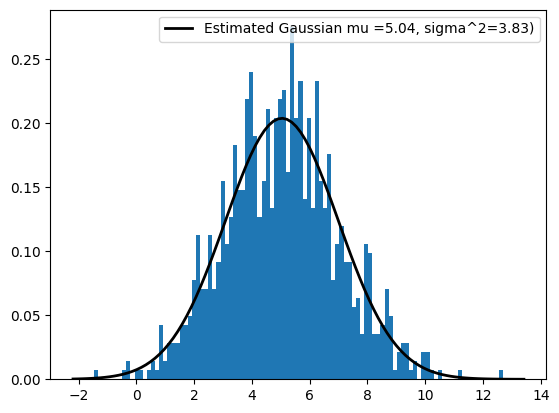

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random dataset
np.random.seed(42) 
mu_true = 5
sigma_true = 2
data = np.random.normal(mu_true, sigma_true, 1000)
mu_mle = np.mean(data)
sigma_mle = np.var(data)

print(f"True Mean: {mu_true}, MLE Mean: {mu_mle}")
print(f"True Variance: {sigma_true**2}, MLE Variance: {sigma_mle}")

# Plot histogram of the data and the estimated Gaussian
plt.hist(data, bins=100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (np.sqrt(2 * np.pi * sigma_mle))) * np.exp(-0.5 * ((x - mu_mle) ** 2 / sigma_mle))
plt.plot(x, p, 'k', linewidth=2, label=f'Estimated Gaussian mu ={mu_mle:.2f}, sigma^2={sigma_mle:.2f})')
plt.legend()
plt.show()
